In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
train_dir = "dataset/train"
val_dir = "dataset/validation"

In [30]:
IMG_HEIGHT = 48
IMG_WIDTH = 48
BATCH_SIZE = 32

In [32]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [34]:
val_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 1902 images belonging to 2 classes.


In [38]:
val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2166 images belonging to 2 classes.


In [40]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.8517 - loss: 0.4579 - val_accuracy: 0.6754 - val_loss: 0.7484
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8748 - loss: 0.3867 - val_accuracy: 0.6754 - val_loss: 0.7135
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.8611 - loss: 0.4155 - val_accuracy: 0.6754 - val_loss: 0.8515
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8566 - loss: 0.4226 - val_accuracy: 0.6754 - val_loss: 0.6780
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - accuracy: 0.8872 - loss: 0.3719 - val_accuracy: 0.6754 - val_loss: 0.6543
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.8590 - loss: 0.4165 - val_accuracy: 0.6754 - val_loss: 0.7442
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8538 - loss: 0.4070 - val_accuracy: 0.6754 - val_loss: 0.7630
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 6s 99ms/step - accuracy: 0.8624 - loss: 0.3985 - val_accuracy: 0.6754 -

In [46]:
val_data.reset()
predictions = model.predict(val_data)
pred_labels = (predictions > 0.5).astype("int32")

68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


In [48]:
true_labels = val_data.classes
class_names = list(val_data.class_indices.keys())

In [50]:
print("Classification Report:\n", classification_report(true_labels, pred_labels, target_names=class_names))

Classification Report:
               precision    recall  f1-score   support

       angry       0.00      0.00      0.00       703
       happy       0.68      1.00      0.81      1463

    accuracy                           0.68      2166
   macro avg       0.34      0.50      0.40      2166
weighted avg       0.46      0.68      0.54      2166



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


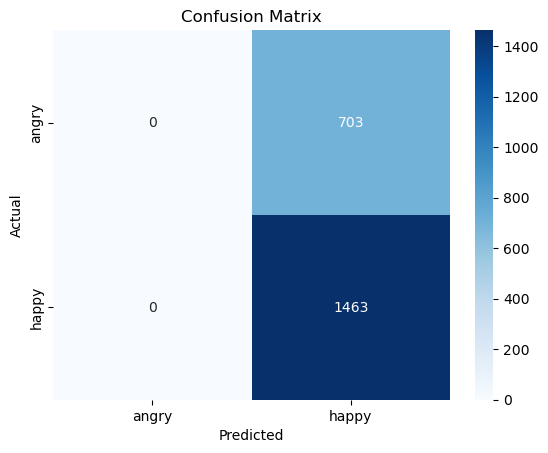

In [52]:
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [54]:
model.save("angry_happy_cnn_model.h5")